## Credit Card Fraud Prediction

In [1]:
import pandas as pd
import numpy as np
import datetime

df=pd.read_csv('credit_card_fraud_100k_with_features.csv')

In [3]:
df

,transaction_id,user_id,transaction_datetime,amount,amount_log,hour,dayofweek,is_weekend,is_night,merchant_id,...,is_far_from_home,switched_country,amount_zscore_user,is_high_amount_user,sum_24h_to_user_mean_ratio,amount_to_merchant_mean_ratio,amount_to_user_mean_ratio,prior_fraud_flag,merchant_base_fraud.1,is_fraud
0,TX0002930,U104531,2024-01-01 00:03:04,264.56,5.581841,0,0,0,1,M102044,...,0,1,2.843345,0,0.0,3.382610,3.303114,0,0.007827,0
1,TX0034746,U102809,2024-01-01 00:03:13,96.36,4.578415,0,0,0,1,M100352,...,0,1,-0.582668,0,0.0,1.196084,0.524854,0,0.003404,0
2,TX0096371,U107319,2024-01-01 00:13:03,8.47,2.248129,0,0,0,1,M100669,...,0,1,-0.805075,0,0.0,0.118244,0.160080,0,0.001019,0
3,TX0059907,U101659,2024-01-01 00:27:36,43.59,3.797510,0,0,0,1,M102043,...,0,1,-0.594376,0,0.0,0.535331,0.487454,0,0.005834,0
4,TX0062762,U100714,2024-01-01 00:37:32,347.86,5.854671,0,0,0,1,M102603,...,0,1,0.748354,0,0.0,5.264026,1.615479,0,0.002007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TX0043377,U103242,2025-08-31 23:10:38,48.98,3.911623,23,6,1,0,M102342,...,0,0,-0.286229,0,0.0,0.760080,0.865053,0,0.006135,0
99996,TX0023380,U107521,2025-08-31 23:14:25,12.39,2.594508,23,6,1,0,M101663,...,0,0,-0.910743,0,0.0,0.191022,0.164845,0,0.003322,0
99997,TX0006321,U106910,2025-08-31 23:24:57,54.18,4.010601,23,6,1,0,M102883,...,0,0,0.727671,0,0.0,0.625194,1.854421,0,0.003922,0
99998,TX0026637,U107697,2025-08-31 23:36:16,14.66,2.751110,23,6,1,0,M101540,...,0,0,-1.021985,0,0.0,0.277570,0.120416,0,0.004193,0


In [4]:
df=df.sort_values('transaction_datetime').reset_index(drop=True)
df

,transaction_id,user_id,transaction_datetime,amount,amount_log,hour,dayofweek,is_weekend,is_night,merchant_id,...,is_far_from_home,switched_country,amount_zscore_user,is_high_amount_user,sum_24h_to_user_mean_ratio,amount_to_merchant_mean_ratio,amount_to_user_mean_ratio,prior_fraud_flag,merchant_base_fraud.1,is_fraud
0,TX0002930,U104531,2024-01-01 00:03:04,264.56,5.581841,0,0,0,1,M102044,...,0,1,2.843345,0,0.0,3.382610,3.303114,0,0.007827,0
1,TX0034746,U102809,2024-01-01 00:03:13,96.36,4.578415,0,0,0,1,M100352,...,0,1,-0.582668,0,0.0,1.196084,0.524854,0,0.003404,0
2,TX0096371,U107319,2024-01-01 00:13:03,8.47,2.248129,0,0,0,1,M100669,...,0,1,-0.805075,0,0.0,0.118244,0.160080,0,0.001019,0
3,TX0059907,U101659,2024-01-01 00:27:36,43.59,3.797510,0,0,0,1,M102043,...,0,1,-0.594376,0,0.0,0.535331,0.487454,0,0.005834,0
4,TX0062762,U100714,2024-01-01 00:37:32,347.86,5.854671,0,0,0,1,M102603,...,0,1,0.748354,0,0.0,5.264026,1.615479,0,0.002007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TX0043377,U103242,2025-08-31 23:10:38,48.98,3.911623,23,6,1,0,M102342,...,0,0,-0.286229,0,0.0,0.760080,0.865053,0,0.006135,0
99996,TX0023380,U107521,2025-08-31 23:14:25,12.39,2.594508,23,6,1,0,M101663,...,0,0,-0.910743,0,0.0,0.191022,0.164845,0,0.003322,0
99997,TX0006321,U106910,2025-08-31 23:24:57,54.18,4.010601,23,6,1,0,M102883,...,0,0,0.727671,0,0.0,0.625194,1.854421,0,0.003922,0
99998,TX0026637,U107697,2025-08-31 23:36:16,14.66,2.751110,23,6,1,0,M101540,...,0,0,-1.021985,0,0.0,0.277570,0.120416,0,0.004193,0


In [5]:
df['transaction_datetime'] = pd.to_datetime(df['transaction_datetime'], errors='coerce')
df['hour'] = df['transaction_datetime'].dt.hour
df['dayofweek'] = df['transaction_datetime'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)
df['is_night'] = df['hour'].isin([0,1,2,3,4,5]).astype(int)
df['amount_log']=np.log1p(df['amount'])


In [6]:
df['time_since_prev_tx_sec']=df.groupby('user_id')['transaction_datetime'].diff().dt.total_seconds().fillna(-1)
df['is_first_tx']=(df['time_since_prev_tx_sec']==-1).astype(int)
df['prev_device']=df.groupby('user_id')['device'].shift()
df['device_change']=(df['prev_device']!=df['device']).astype(int).fillna(0)
df['prev_merchant']=df.groupby('user_id')['merchant_id'].shift()
df['consec_same_merchant']=(df['prev_merchant']==df['merchant_id']).astype(int).fillna(0)
df['user_tx_count_sofar']=df.groupby('user_id').cumcount()
df['user_cum_amount_sofar']=df.groupby('user_id')['amount'].cumcount()-df['amount']

df['device_code']=df['device'].astype('category').cat.codes ##encode

In [7]:
df['transaction_datetime'].dtype


dtype('<M8[ns]')

In [8]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_datetime', 'amount',
       'amount_log', 'hour', 'dayofweek', 'is_weekend', 'is_night',
       'merchant_id', 'merchant_category', 'merchant_category_code',
       'merchant_mean_amt', 'merchant_tx_count', 'merchant_base_fraud',
       'device', 'device_code', 'payment_method', 'payment_method_code',
       'channel', 'user_country', 'user_account_age_days', 'user_avg_amount',
       'user_mean_amt', 'user_std_amt', 'user_median_amt', 'cnt_1h_prev',
       'cnt_24h_prev', 'cnt_7d_prev', 'sum_1h_prev', 'sum_24h_prev',
       'sum_7d_prev', 'time_since_prev_tx_sec', 'is_first_tx', 'device_change',
       'consec_same_merchant', 'user_tx_count_sofar', 'user_cum_amount_sofar',
       'user_avg_amount_prev', 'dist_from_home_km', 'dist_merchant_to_home_km',
       'dist_prev_tx_km', 'is_far_from_home', 'switched_country',
       'amount_zscore_user', 'is_high_amount_user',
       'sum_24h_to_user_mean_ratio', 'amount_to_merchant_mean_ratio',


# Feature Explanations by Category in Credit Card Fraud Dataset

This dataset contains features grouped into logical categories useful for modeling credit card fraud detection.

## 1. Transaction Metadata Features
- **transaction_id**: Unique identifier for each transaction.
- **transaction_datetime**: Timestamp of when the transaction took place.
- **amount**: Transaction amount in currency.
- **amount_log**: Logarithm of amount to reduce skewed distribution effects.
- **channel**: The channel through which the transaction was made (e.g., online or in-store).
- **payment_method / payment_method_code**: Method of payment (chip, swipe, contactless) and its encoded form.
- **device / device_code**: The device type used for transaction (mobile, desktop) and encoded.

## 2. User Behavioral Features
- **user_id**: Identifier for the cardholder.
- **user_country**: Country of the user.
- **user_account_age_days**: Number of days since the user account was created.
- **user_avg_amount, user_mean_amt, user_std_amt, user_median_amt**: Statistical measures of the user's transaction amounts.
- **cnt_1h_prev, cnt_24h_prev, cnt_7d_prev**: Counts of transactions the user made in last 1 hour, 24 hours, and 7 days.
- **sum_1h_prev, sum_24h_prev, sum_7d_prev**: Sum of transaction amounts over these time windows.
- **time_since_prev_tx_sec**: Time elapsed (in seconds) since the user's last transaction.
- **is_first_tx**: Flag indicating if this is the user's first transaction.
- **device_change**: Indicates if device changed from previous transaction.
- **user_tx_count_sofar, user_cum_amount_sofar**: Cumulative count and sum of user's transactions so far.
- **user_avg_amount_prev**: Average amount of previous transactions.
- **amount_zscore_user**: Z-score showing how unusual the current amount is relative to user's pattern.
- **is_high_amount_user**: Flag for unusually high transaction amount.
- **sum_24h_to_user_mean_ratio, amount_to_user_mean_ratio**: Ratios comparing recent spend and current amount to user’s mean.

## 3. Merchant Features
- **merchant_id**: Identifier of the merchant.
- **merchant_category / merchant_category_code**: Category and code of merchant's business.
- **merchant_mean_amt**: Average transaction amount for merchant.
- **merchant_tx_count**: Number of transactions for merchant.
- **merchant_base_fraud / merchant_base_fraud.1**: Historical fraud rates for the merchant.
- **amount_to_merchant_mean_ratio**: Ratio of current amount to merchant’s average.
- **consec_same_merchant**: Flag if consecutive transactions were at the same merchant.

## 4. Temporal Features
- **hour**: Hour of the day (0-23) when transaction occurred.
- **dayofweek**: Day of the week (0=Monday to 6=Sunday).
- **is_weekend**: Flag if transaction occurred on a weekend.
- **is_night**: Flag if transaction occurred during night hours.

## 5. Spatial and Location Features
- **dist_from_home_km**: Distance in kilometers from user’s home to transaction location.
- **dist_merchant_to_home_km**: Distance from merchant to user’s home.
- **dist_prev_tx_km**: Distance from previous transaction location.
- **is_far_from_home**: Flag if transaction location is far from user's typical area.
- **switched_country**: Flag if transaction country changed relative to previous transaction.

## 6. Fraud History and Target Label
- **prior_fraud_flag**: Flag indicating whether the user had prior fraudulent transactions.
- **is_fraud**: Target variable indicating if the transaction is fraudulent (1) or legitimate (0).

---

**Total Features Explained:** 52 features are described here across 6 comprehensive categories.

This detailed separation helps understand feature contexts for fraud detection and supports effective modeling by focusing on behavioral, temporal, spatial, and historical patterns.

In [9]:
df['merchant_category'].unique()

array(['electronics', 'health', 'restaurants', 'travel', 'education',
       'grocery', 'online_services', 'luxury', 'fashion', 'utilities',
       'gaming', 'entertainment'], dtype=object)

## Exploratory Data Analysis

In [10]:
# 1. Data Overview
print("Dataset shape:", df.shape)
print("Data types:\n", df.dtypes)
print("First 5 rows:\n", df.head())
print("Duplicate entries:", df.duplicated().sum())
print("Class distribution:\n", df['is_fraud'].value_counts())

Dataset shape: (100000, 54)
Data types:
 transaction_id                           object
user_id                                  object
transaction_datetime             datetime64[ns]
amount                                  float64
amount_log                              float64
hour                                      int32
dayofweek                                 int32
is_weekend                                int64
is_night                                  int64
merchant_id                              object
merchant_category                        object
merchant_category_code                    int64
merchant_mean_amt                       float64
merchant_tx_count                         int64
merchant_base_fraud                     float64
device                                   object
device_code                                int8
payment_method                           object
payment_method_code                       int64
channel                                  object

In [11]:
# 2. Missing Values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 transaction_id                      0
user_id                             0
transaction_datetime                0
amount                              0
amount_log                          0
hour                                0
dayofweek                           0
is_weekend                          0
is_night                            0
merchant_id                         0
merchant_category                   0
merchant_category_code              0
merchant_mean_amt                   0
merchant_tx_count                   0
merchant_base_fraud                 0
device                              0
device_code                         0
payment_method                      0
payment_method_code                 0
channel                             0
user_country                        0
user_account_age_days               0
user_avg_amount                     0
user_mean_amt                       0
user_std_amt                        0
user_median_amt       

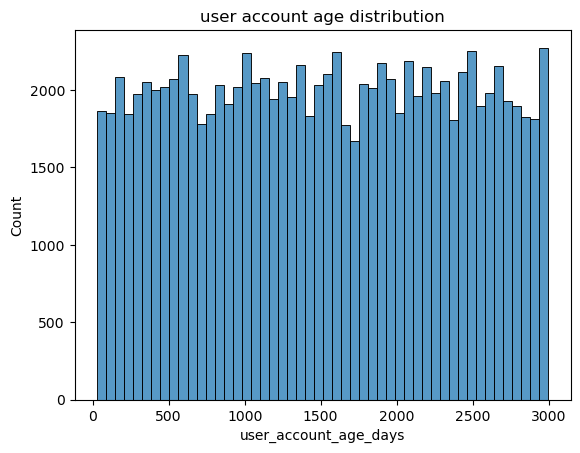

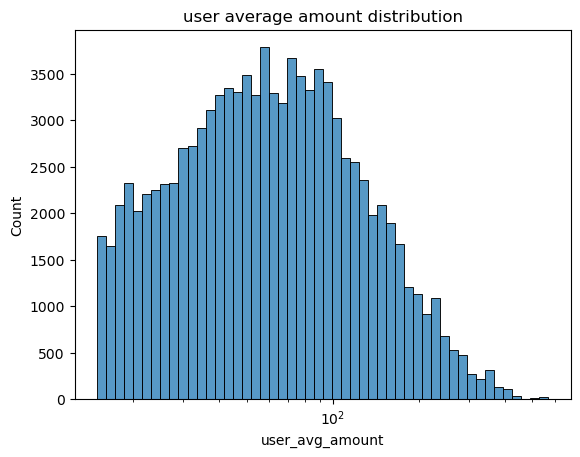

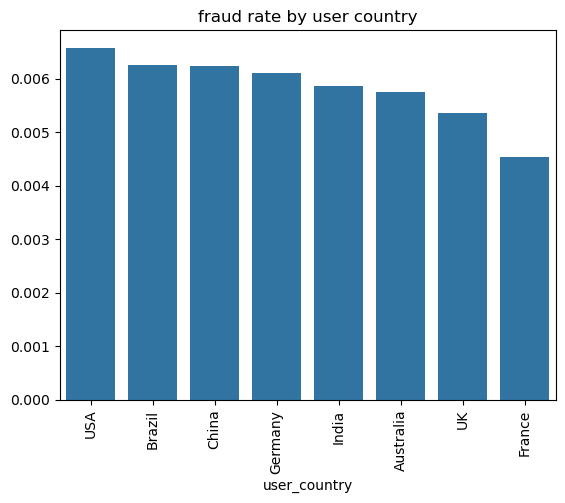

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['user_account_age_days'],bins=50)
plt.title('user account age distribution')
plt.show()

sns.histplot(df['user_avg_amount'],bins=50,log_scale=True)
plt.title('user average amount distribution')
plt.show()

user_country_fraud=df.groupby('user_country')['is_fraud'].mean().sort_values(ascending=False)

sns.barplot(x=user_country_fraud.index,y=user_country_fraud.values)

plt.xticks(rotation=90)
plt.title('fraud rate by user country')
plt.show()

## 3. Merchant Features
- **merchant_id**: Identifier of the merchant.
- **merchant_category / merchant_category_code**: Category and code of merchant's business.
- **merchant_mean_amt**: Average transaction amount for merchant.
- **merchant_tx_count**: Number of transactions for merchant.
- **merchant_base_fraud / merchant_base_fraud.1**: Historical fraud rates for the merchant.
- **amount_to_merchant_mean_ratio**: Ratio of current amount to merchant’s average.
- **consec_same_merchant**: Flag if consecutive transactions were at the same merchant.


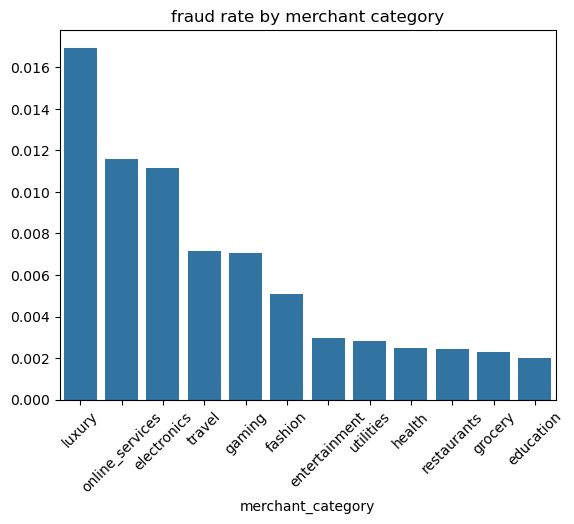

In [13]:
merchant_category_fraud=df.groupby('merchant_category')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=merchant_category_fraud.index,y=merchant_category_fraud.values)
plt.xticks(rotation=45)
plt.title('fraud rate by merchant category')
plt.show()

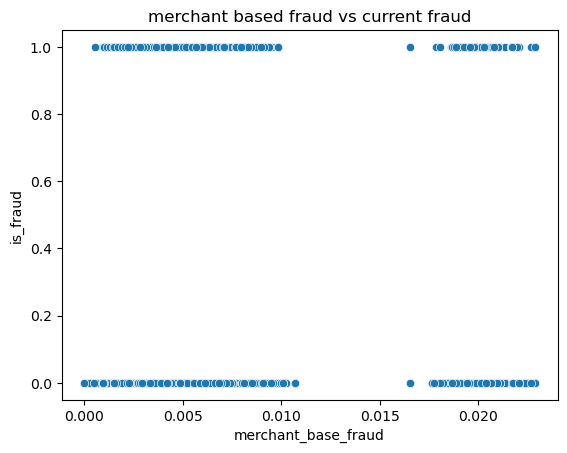

In [14]:
sns.scatterplot(x='merchant_base_fraud',y='is_fraud',data=df)
plt.title('merchant based fraud vs current fraud')
plt.show()

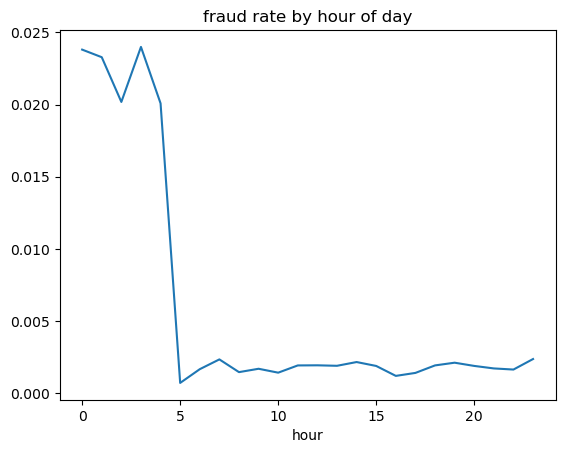

In [15]:
hour_fraud=df.groupby('hour')['is_fraud'].mean()
sns.lineplot(x=hour_fraud.index,y=hour_fraud.values)
plt.title('fraud rate by hour of day')
plt.show()

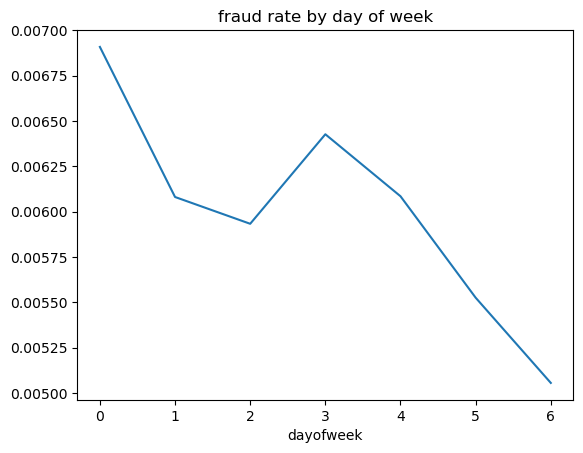

In [16]:
dow_fraud=df.groupby('dayofweek')['is_fraud'].mean()
sns.lineplot(x=dow_fraud.index,y=dow_fraud.values)
plt.title('fraud rate by day of week')
plt.show()

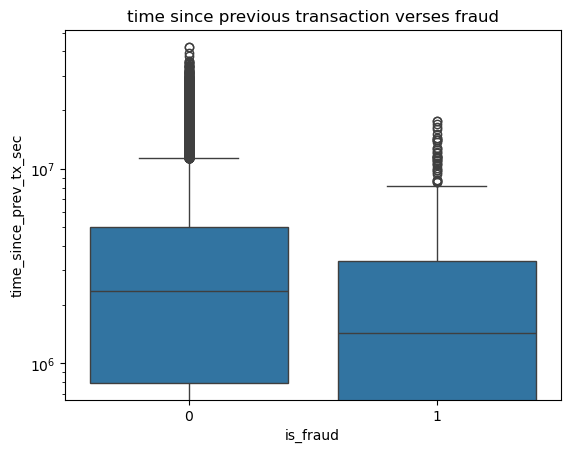

In [17]:
sns.boxplot(x='is_fraud',y='time_since_prev_tx_sec',data=df)
plt.title('time since previous transaction verses fraud')
plt.yscale('log')
plt.show()

##经常消费的人更容易被 fraud transaction。经常消费的人不去check自己的消费情况

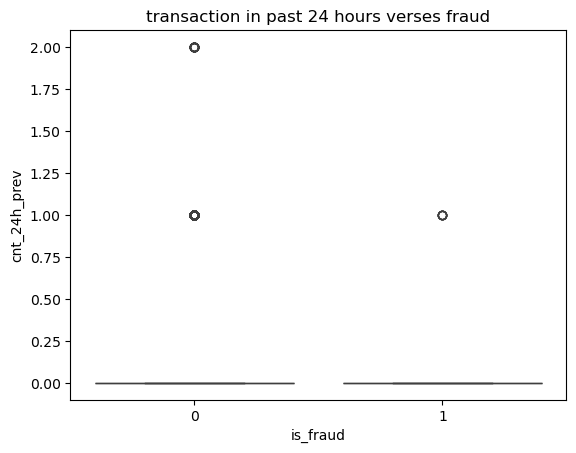

In [18]:
sns.boxplot(x='is_fraud',y='cnt_24h_prev',data=df)
plt.title('transaction in past 24 hours verses fraud')
plt.show()

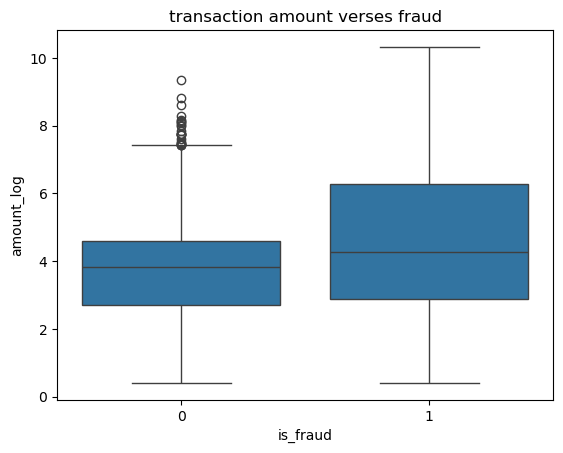

In [19]:
sns.boxplot(x='is_fraud',y='amount_log',data=df)
plt.title('transaction amount verses fraud')
plt.show()

##欺诈比非欺诈是fraud更大

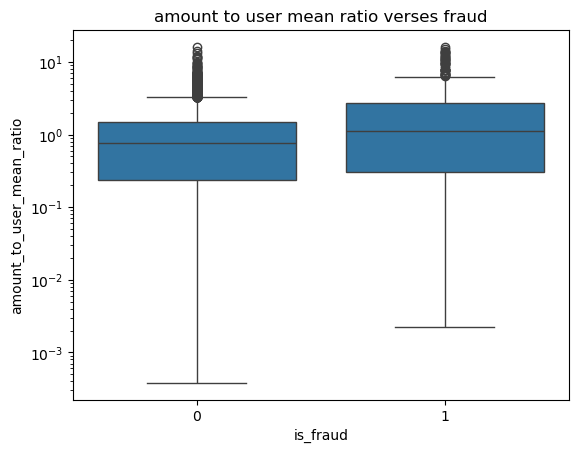

In [20]:
sns.boxplot(x='is_fraud',y='amount_to_user_mean_ratio',data=df)
plt.title('amount to user mean ratio verses fraud')
plt.yscale('log')
plt.show()

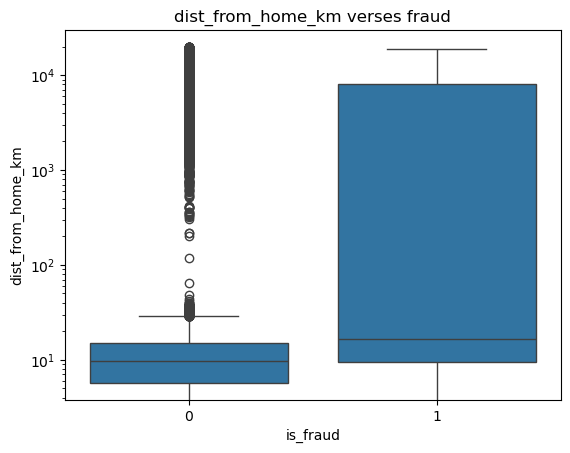

In [21]:
sns.boxplot(x='is_fraud',y='dist_from_home_km',data=df)
plt.title('dist_from_home_km verses fraud')
plt.yscale('log')
plt.show()

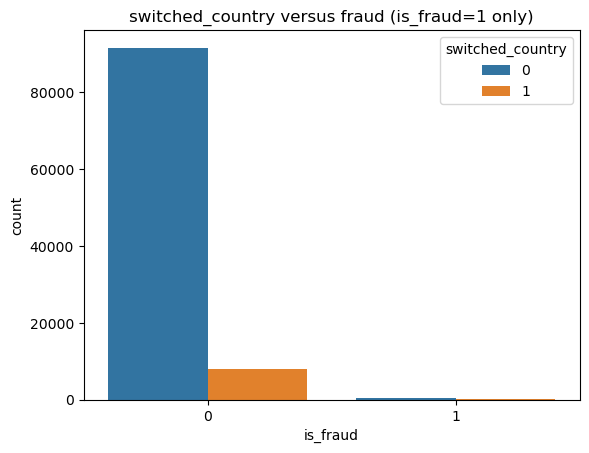

In [23]:
sns.countplot(x='is_fraud', hue='switched_country', data=df)
plt.title('switched_country versus fraud (is_fraud=1 only)')
plt.show()

In [24]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

In [29]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import lightgbm as lgb
import shap
import joblib
from typing import Dict, Any, Tuple

In [62]:
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
except Exception as e:
    tf = None
    keras = None
    print("tensorflow/keras not available. Autoencoder section will be skipped.")

In [56]:
RANDOM_STATE=42

TEST_SIZE=0.2

VALID_SIZE=0.1

num_feats_to_keep=None

In [36]:
df

,transaction_id,user_id,transaction_datetime,amount,amount_log,hour,dayofweek,is_weekend,is_night,merchant_id,...,amount_zscore_user,is_high_amount_user,sum_24h_to_user_mean_ratio,amount_to_merchant_mean_ratio,amount_to_user_mean_ratio,prior_fraud_flag,merchant_base_fraud.1,is_fraud,prev_device,prev_merchant
0,TX0002930,U104531,2024-01-01 00:03:04,264.56,5.581841,0,0,0,1,M102044,...,2.843345,0,0.0,3.382610,3.303114,0,0.007827,0,NaN,NaN
1,TX0034746,U102809,2024-01-01 00:03:13,96.36,4.578415,0,0,0,1,M100352,...,-0.582668,0,0.0,1.196084,0.524854,0,0.003404,0,NaN,NaN
2,TX0096371,U107319,2024-01-01 00:13:03,8.47,2.248129,0,0,0,1,M100669,...,-0.805075,0,0.0,0.118244,0.160080,0,0.001019,0,NaN,NaN
3,TX0059907,U101659,2024-01-01 00:27:36,43.59,3.797510,0,0,0,1,M102043,...,-0.594376,0,0.0,0.535331,0.487454,0,0.005834,0,NaN,NaN
4,TX0062762,U100714,2024-01-01 00:37:32,347.86,5.854671,0,0,0,1,M102603,...,0.748354,0,0.0,5.264026,1.615479,0,0.002007,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TX0043377,U103242,2025-08-31 23:10:38,48.98,3.911623,23,6,1,0,M102342,...,-0.286229,0,0.0,0.760080,0.865053,0,0.006135,0,pos,M101233
99996,TX0023380,U107521,2025-08-31 23:14:25,12.39,2.594508,23,6,1,0,M101663,...,-0.910743,0,0.0,0.191022,0.164845,0,0.003322,0,mobile,M102779
99997,TX0006321,U106910,2025-08-31 23:24:57,54.18,4.010601,23,6,1,0,M102883,...,0.727671,0,0.0,0.625194,1.854421,0,0.003922,0,mobile,M100273
99998,TX0026637,U107697,2025-08-31 23:36:16,14.66,2.751110,23,6,1,0,M101540,...,-1.021985,0,0.0,0.277570,0.120416,0,0.004193,0,mobile,M100611


In [38]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_datetime', 'amount',
       'amount_log', 'hour', 'dayofweek', 'is_weekend', 'is_night',
       'merchant_id', 'merchant_category', 'merchant_category_code',
       'merchant_mean_amt', 'merchant_tx_count', 'merchant_base_fraud',
       'device', 'device_code', 'payment_method', 'payment_method_code',
       'channel', 'user_country', 'user_account_age_days', 'user_avg_amount',
       'user_mean_amt', 'user_std_amt', 'user_median_amt', 'cnt_1h_prev',
       'cnt_24h_prev', 'cnt_7d_prev', 'sum_1h_prev', 'sum_24h_prev',
       'sum_7d_prev', 'time_since_prev_tx_sec', 'is_first_tx', 'device_change',
       'consec_same_merchant', 'user_tx_count_sofar', 'user_cum_amount_sofar',
       'user_avg_amount_prev', 'dist_from_home_km', 'dist_merchant_to_home_km',
       'dist_prev_tx_km', 'is_far_from_home', 'switched_country',
       'amount_zscore_user', 'is_high_amount_user',
       'sum_24h_to_user_mean_ratio', 'amount_to_merchant_mean_ratio',


In [41]:
def get_default_feature_lists(df):
    user_feats=['user_country', 'user_account_age_days', 'user_avg_amount',
       'user_mean_amt', 'user_std_amt', 'user_median_amt','prior_fraud_flag']
    merchant_feats=['merchant_category', 'merchant_category_code',
       'merchant_mean_amt', 'merchant_tx_count', 'merchant_base_fraud']
    window_feats=['cnt_1h_prev',
       'cnt_24h_prev', 'cnt_7d_prev', 'sum_1h_prev', 'sum_24h_prev',
       'sum_7d_prev']
    seq_feats=['time_since_prev_tx_sec', 'is_first_tx', 'device_change',
       'consec_same_merchant', 'user_tx_count_sofar', 'user_cum_amount_sofar',
       'user_avg_amount_prev']
    txn_feats=['amount',
       'amount_log', 'hour', 'dayofweek', 'is_weekend', 'is_night','payment_method', 'payment_method_code',
       'channel']
    device_feats=['device', 'device_code']
    geo_feats=['dist_from_home_km', 'dist_merchant_to_home_km',
       'dist_prev_tx_km', 'is_far_from_home', 'switched_country']
    stats_feats=['amount_zscore_user', 'is_high_amount_user',
       'sum_24h_to_user_mean_ratio', 'amount_to_merchant_mean_ratio',
       'amount_to_user_mean_ratio']
    all_feats=user_feats+merchant_feats+window_feats+seq_feats+txn_feats+device_feats+geo_feats+stats_feats
    exist=[c for c in all_feats if c in df.columns]
    return exist

def preprocessing(df,feature_cols,categorical_cols):
    df=df.copy()
    for c in feature_cols:
        if c not in categorical_cols:
            if df[c].isnull().any():
                df[c]=df[c].fillna(df[c].median())
        else: 
            df[c]=df[c].fillna('missing').astype(str)
    label_encoders={}
    for c in categorical_cols:
        le=LabelEncoder()
        df[c]=le.fit_transform(df[c])
        label_encoders[c]=le
    return df,label_encoders

features=get_default_feature_lists(df)

In [42]:
categorical_cols = [c for c in features if df[c].dtype == 'object' or c.endswith('_code') or c in ['user_country','merchant_category','device','payment_method','channel','is_first_tx','is_weekend','is_night','is_high_amount_user','is_far_from_home','switched_country','prior_fraud_flag'] and c in df.columns]
categorical_cols = [c for c in categorical_cols if c in features]
print("Categorical features:", categorical_cols)

Categorical features: ['user_country', 'prior_fraud_flag', 'merchant_category', 'merchant_category_code', 'is_first_tx', 'is_weekend', 'is_night', 'payment_method', 'payment_method_code', 'channel', 'device', 'device_code', 'is_far_from_home', 'switched_country', 'is_high_amount_user']


In [44]:
df_proc, label_encoders = preprocessing(df, features, categorical_cols)
X = df_proc[features]
y = df_proc['is_fraud'].astype(int)

In [52]:
##Train Test Split
if 'transaction_datetime' in df.columns:
    try:
        df['transaction_datetime'] = pd.to_datetime(df['transaction_datetime'])
        df_sorted = df.sort_values('transaction_datetime')
        cutoff = df_sorted['transaction_datetime'].quantile(1 - TEST_SIZE)
        train_idx = df_sorted['transaction_datetime'] < cutoff
        test_idx = df_sorted['transaction_datetime'] >= cutoff
        X_train = X.loc[train_idx]
        y_train = y.loc[train_idx]
        X_test = X.loc[test_idx]
        y_test = y.loc[test_idx]
        print(f"Time-based split using transaction_datetime, train shape {X_train.shape}, test shape {X_test.shape}")
    except Exception as e:
        # fallback
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
        print("Fallback stratified split used.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
    print(f"Stratified split used, train shape {X_train.shape}, test shape {X_test.shape}")

Time-based split using transaction_datetime, train shape (80000, 46), test shape (20000, 46)


In [53]:
##Scaling for Logistic Regression
num_cols = [c for c in features if c not in categorical_cols]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
if len(num_cols) > 0:
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [54]:
##Logistic Regression Baseline model

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)
lr.fit(X_train_scaled, y_train)
y_pred_lr_proba = lr.predict_proba(X_test_scaled)[:,1]
y_pred_lr = (y_pred_lr_proba >= 0.5).astype(int)

def evaluate_model(y_true, y_pred, y_proba, name="model"):
    print(f"\n=== Evaluation: {name} ===")
    print("ROC AUC:", roc_auc_score(y_true, y_proba))
    print("Average Precision (PR AUC):", average_precision_score(y_true, y_proba))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, zero_division=0))
    print("F1:", f1_score(y_true, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))

evaluate_model(y_test, y_pred_lr, y_pred_lr_proba, name="LogisticRegression (balanced)")


=== Evaluation: LogisticRegression (balanced) ===
ROC AUC: 0.9913372730998559
Average Precision (PR AUC): 0.39992344224000953
Precision: 0.14668769716088328
Recall: 0.9789473684210527
F1: 0.2551440329218107
Confusion Matrix:
 [[19364   541]
 [    2    93]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     19905
           1       0.15      0.98      0.26        95

    accuracy                           0.97     20000
   macro avg       0.57      0.98      0.62     20000
weighted avg       1.00      0.97      0.98     20000



In [59]:
##LightGBM model
lgb_model = None
if lgb is not None:
    print("\nTraining LightGBM...")
    # prepare dataset
    # split train into train/val for early stopping
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=VALID_SIZE, random_state=RANDOM_STATE, stratify=y_train)
    dtrain = lgb.Dataset(X_tr, label=y_tr)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)
    params = {
        'objective':'binary',
        'metric':'auc',
        'is_unbalance': True,  # helpful for imbalance
        'learning_rate':0.1,
        'num_leaves':31,
        'verbose':-1,
        'seed':RANDOM_STATE
    }
    callbacks = [lgb.early_stopping(stopping_rounds=20)]
    lgb_model = lgb.train(params, dtrain, valid_sets=[dval], num_boost_round=200, callbacks=callbacks)
    y_pred_lgb_proba = lgb_model.predict(X_test)
    y_pred_lgb = (y_pred_lgb_proba >= 0.5).astype(int)
    evaluate_model(y_test, y_pred_lgb, y_pred_lgb_proba, name="LightGBM")

else:
    print("Skipping LightGBM: not installed.")


Training LightGBM...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.934665

=== Evaluation: LightGBM ===
ROC AUC: 0.9597176059969064
Average Precision (PR AUC): 0.4042686450435224
Precision: 0.25806451612903225
Recall: 0.9263157894736842
F1: 0.4036697247706422
Confusion Matrix:
 [[19652   253]
 [    7    88]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19905
           1       0.26      0.93      0.40        95

    accuracy                           0.99     20000
   macro avg       0.63      0.96      0.70     20000
weighted avg       1.00      0.99      0.99     20000



In [ ]:
###Acceptable 0.5 F1 Score; SMOTE，feature enginnering, parameters fix, ROC-AUC

### 0.1-0.3弱；>0.5 F1 Score, 非常优秀，处理不平衡数据（over sampling, undersampling weight change; feature engineering更有意义的features; XGBoost, CatBoost, neural Network, Pr大于多少是fraud, 小于多少是fraud 

In [63]:
##Autoencoder (unsupervised anomaly detection)
ae_scores = None
ae_threshold = None
ae_model = None
if keras is not None and tf is not None:
    print("\nTraining Autoencoder on non-fraud samples...")
    # We'll train autoencoder on non-fraud data only (unsupervised)
    X_train_ae = X_train[y_train == 0].copy()  # only normals
    # Scale numeric for AE
    ae_scaler = StandardScaler()
    if len(num_cols) > 0:
        X_train_ae[num_cols] = ae_scaler.fit_transform(X_train_ae[num_cols])
        X_test_ae = X_test.copy()
        X_test_ae[num_cols] = ae_scaler.transform(X_test_ae[num_cols])
    else:
        X_test_ae = X_test.copy()
    input_dim = X_train_ae.shape[1]
    # Simple dense autoencoder
    tf.keras.backend.clear_session()
    ae = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(max(4, int(input_dim/2)), activation='relu'),
        layers.Dense(max(2, int(input_dim/4)), activation='relu'),
        layers.Dense(max(4, int(input_dim/2)), activation='relu'),
        layers.Dense(input_dim, activation='linear')
    ])
    ae.compile(optimizer='adam', loss='mse')
    # Train with small epochs to be quick (adjust in your environment)
    ae.fit(X_train_ae, X_train_ae, epochs=20, batch_size=256, validation_split=0.1, verbose=0)
    # reconstruction error on test set
    recon = ae.predict(X_test_ae)
    mse = np.mean(np.square(recon - X_test_ae), axis=1)
    ae_scores = mse  # higher -> more anomalous
    # choose threshold as 99th percentile of recon error on training normals
    recon_train = ae.predict(X_train_ae)
    mse_train = np.mean(np.square(recon_train - X_train_ae), axis=1)
    ae_threshold = np.percentile(mse_train, 99)
    y_pred_ae = (ae_scores >= ae_threshold).astype(int)
    if 'is_fraud' in y_test.index:
        evaluate_model(y_test, y_pred_ae, ae_scores, name="Autoencoder (reconstruction error)")
    else:
        evaluate_model(y_test, y_pred_ae, ae_scores, name="Autoencoder (reconstruction error)")
    ae_model = ae
else:
    print("Skipping Autoencoder: tensorflow/keras not installed.")


Training Autoencoder on non-fraud samples...


2025-10-20 04:14:33.654593: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10534 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:da:00.0, compute capability: 6.1
2025-10-20 04:14:35.418321: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc8f850bc90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-20 04:14:35.418384: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2025-10-20 04:14:35.430439: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-20 04:14:35.461907: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1760933675.614001     969 device_compiler.h:186] Compiled cluster using

2485/2485 [==============================] - 5s 2ms/step

=== Evaluation: Autoencoder (reconstruction error) ===
ROC AUC: 0.788664577797168
Average Precision (PR AUC): 0.05706705206319562
Precision: 0.0821917808219178
Recall: 0.18947368421052632
F1: 0.11464968152866242
Confusion Matrix:
 [[19704   201]
 [   77    18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19905
           1       0.08      0.19      0.11        95

    accuracy                           0.99     20000
   macro avg       0.54      0.59      0.55     20000
weighted avg       0.99      0.99      0.99     20000




Top LightGBM feature importances (gain):
hour                             1.863960e+06
amount                           1.382299e+06
device_change                    6.958264e+05
prior_fraud_flag                 6.600356e+05
is_far_from_home                 2.827150e+05
payment_method                   2.494110e+05
dist_from_home_km                1.674711e+05
amount_to_merchant_mean_ratio    8.496950e+04
merchant_base_fraud              5.718402e+04
amount_to_user_mean_ratio        2.869950e+04
user_median_amt                  2.428070e+04
user_std_amt                     1.583330e+04
dist_prev_tx_km                  1.361820e+04
user_account_age_days            8.197740e+03
dayofweek                        6.703770e+03
cnt_24h_prev                     0.000000e+00
merchant_tx_count                0.000000e+00
merchant_mean_amt                0.000000e+00
merchant_category                0.000000e+00
merchant_category_code           0.000000e+00
dtype: float64

Computing SHAP values.

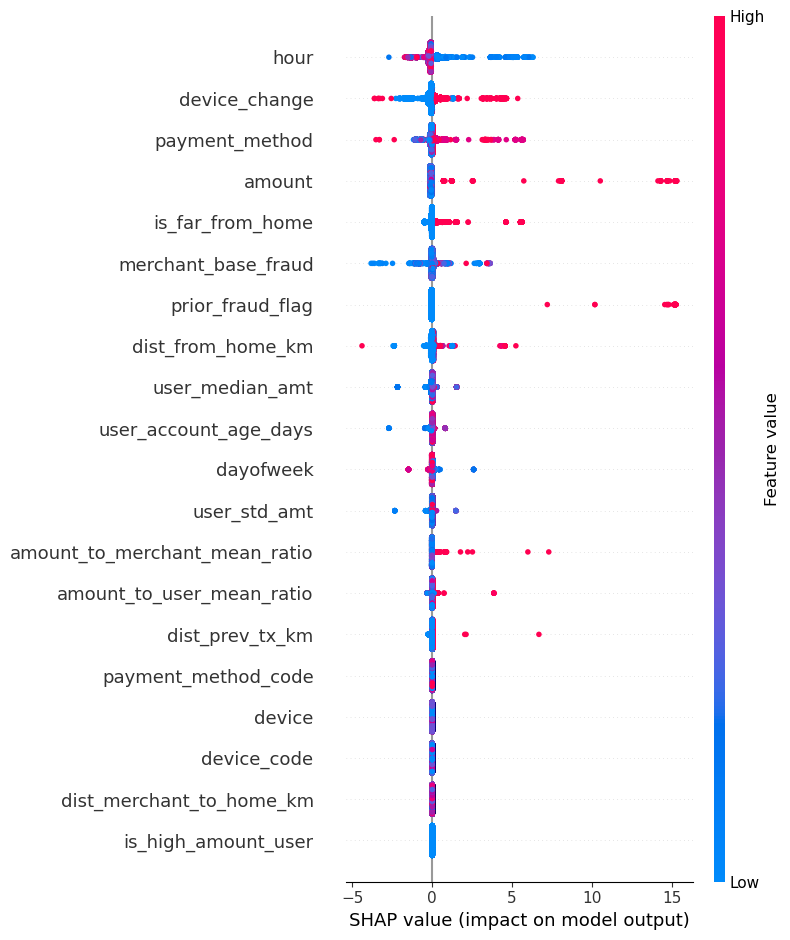

In [64]:
##Feature importance (LightGBM)
if lgb_model is not None:
    importances = pd.Series(lgb_model.feature_importance(importance_type='gain'), index=X_train.columns).sort_values(ascending=False)
    print("\nTop LightGBM feature importances (gain):")
    print(importances.head(20))
if shap is not None:
    print("\nComputing SHAP values...")
    # For LightGBM use TreeExplainer if available
    try:
        if lgb_model is not None:
            explainer_lgb = shap.TreeExplainer(lgb_model)
            shap_values_lgb = explainer_lgb.shap_values(X_test)
            # summary plot saved
            if plt is not None:
                plt.figure(figsize=(8,6))
                shap.summary_plot(shap_values_lgb, X_test, show=False)
                plt.tight_layout()
                plt.savefig("shap_summary_lgb.png", bbox_inches='tight')
                print("Saved shap_summary_lgb.png")
        # For Logistic Regression use LinearExplainer
        explainer_lr = shap.LinearExplainer(lr, X_train_scaled,feature_dependence="independent")
        shap_values_lr = explainer_lr.shap_values(X_test_scaled)
        if plt is not None:
            plt.figure(figsize=(8,6))
            shap.summary_plot(shap_values_lr, X_test, show=False)
            plt.tight_layout()
            plt.savefig("shap_summary_lr.png", bbox_inches='tight')
            print("Saved shap_summary_lr.png")
    except Exception as e:
        print("Error computing SHAP:", e)
else:
    print("Skipping SHAP: shap not installed.")

In [66]:
outputs = {}
outputs['logistic'] = {
    'model': lr,
    'y_pred_proba': y_pred_lr_proba,
    'y_pred': y_pred_lr
}
if lgb_model is not None:
    outputs['lightgbm'] = {
        'model': lgb_model,
        'y_pred_proba': y_pred_lgb_proba,
        'y_pred': y_pred_lgb
    }
if ae_scores is not None:
    outputs['autoencoder'] = {
        'model': ae_model,
        'scores': ae_scores,
        'threshold': ae_threshold
    }

# Show top rows of processed training data for verification
print("\nProcessed training sample (top 5 rows):")
display_df = X_train.head().copy()
display_df['is_fraud'] = y_train.head()
try:
    # Attempt to show as DataFrame printout
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Processed training sample", display_df)
except Exception:
    print(display_df)

print("\nPipeline complete. Artifacts saved (if shap/matplotlib available): shap_summary_lr.png")


Processed training sample (top 5 rows):
   user_country  user_account_age_days  user_avg_amount  user_mean_amt  \
0             7                    474            67.34      80.094118   
1             6                   1233           116.42     183.593750   
2             3                   1836            35.79      52.911111   
3             4                   1324           162.37      89.423846   
4             7                    489           201.95     215.329333   

   user_std_amt  user_median_amt  prior_fraud_flag  merchant_category  \
0     64.876353           62.650                 0                  1   
1    149.714430          180.075                 0                  6   
2     55.201180           33.055                 0                  9   
3     77.112533           96.410                 0                 10   
4    177.096264          157.700                 0                  0   

   merchant_category_code  merchant_mean_amt  ...  dist_merchant_to_home_km

1. Load raw data, parse timestamps
2. Create basic transforms: amount_log, hour sin/cos, is_night
3. Compute user-level historical aggregates (user_mean_amt, user_std_amt) with shift(1)
4. Compute window features (cnt_24h_prev, sum_24h_prev) via groupby+rolling
5. Encode categorical: frequency encoding for merchant_id; one-hot for merchant_category
6. Split data by time: train <= t0, val in (t0,t1], test > t1
7. Scale numerics (for LR); train Logistic (class_weight='balanced') and LightGBM (is_unbalance=True)
8. Evaluate using PR-AUC, precision@threshold, recall; choose threshold by business cost
9. Use SHAP to explain top contributing features per fraud prediction; persist top-3 reasons
10. Deploy model in online service; compute online features from streaming states; monitor drift & performance